In [1]:
from IPython.display import Image

# Projeto Final - Disciplina de Mineração da Dados
# Autoencoder vs Filter Methods vs  Wrapper Methods
# Aluno: José Luiz Vilas Boas
# Professor: Dr. Danilo Sipoli Sanches

### Artigo: Prediction and prioritization of autism-associated long non-coding RNAs using gene expression and sequence features.
### Autores: Wang, Jun e Wang, Liangjiang.

## Objetivos do trabalho dos autores:
- Indentificar genes canditados ao Autism spectrum disorders (ASD);
- Desenvolveram um modelo de máquina machine learning para previsão e priorização de lncRNAs candidatos           associados a ASD;
- Redução da dimensionalidade.

# Autoencoders
- "Autoencoder é um tipo de rede neural que pode ser usada para aprender uma representação compactada de dados brutos" [1];
- "É um método de aprendizagem não supervisionado, embora, tecnicamente, sejam treinados por meio de métodos de aprendizagem supervisionados, denominados de auto-supervisão" [1].

## Comando  para deixar iopub.data_rate maior que o padrão:
### 1 - Abra um jupyter notebook com o comando abaixo: 
### jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

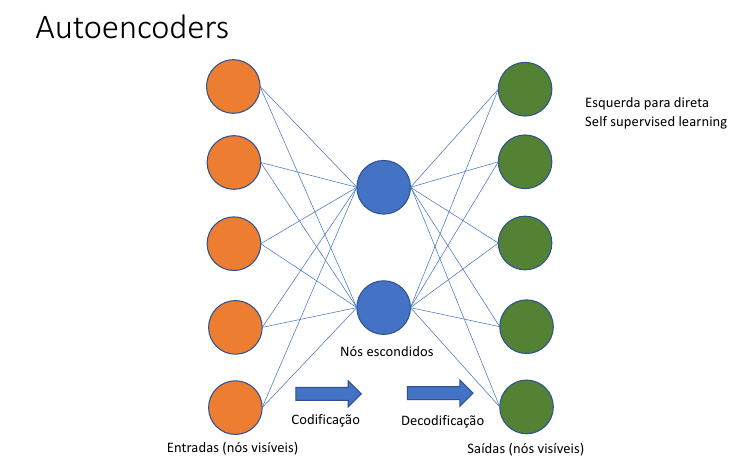

In [2]:
Image(filename='autoencoder.png')

# Materiais e ferramantas utilizadas
- Sequencias de lncRNA e RNA transcritos de humanos do reposítório GENCODE: https://www.gencodegenes.org/;
- MathFeature e IFeature para Feature extraction;
- Seqkit para algumas funções de pré-processamento;
- Máquinas preditivas: Regressão Logística  Random Forest para construção do modelo.

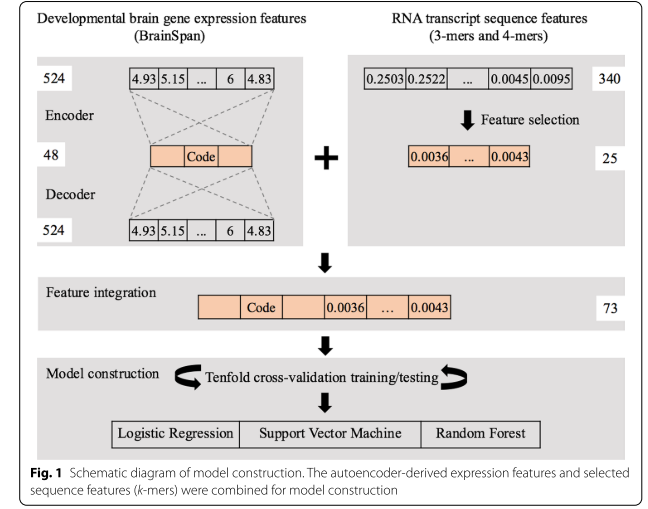

In [4]:
Image(filename='metodologia.png')

## Pré-processamento

### Contando as sequências. Vou usar o software  seqkit

In [ ]:
#lncRNA
!grep ">" basesHumano/gencode.v38.lncRNA_transcripts.fasta | wc -l

In [ ]:
#RNA Transcritos
!grep ">" basesHumano/gencode.v38.pc_transcripts.fasta | wc -l

### Removendo os ruídos e dados duplicados

In [ ]:
#lncRNA
!seqkit rmdup -s < basesHumano/gencode.v38.lncRNA_transcripts.fasta > basesHumano/lncrna_noduplicado.fasta

In [ ]:
#RNA Transcritos
!seqkit rmdup -s < basesHumano/gencode.v38.pc_transcripts.fasta > basesHumano/rna_trancr_noduplicado.fasta

## Usando as funções de pré-processamento do MathFeature

### Eliminando ruídos como outras anotações(letras): k,N...

In [ ]:
#lncRNA
!python3 MathFeature/preprocessing/preprocessing.py -i basesHumano/lncrna_noduplicado.fasta -o basesHumano/lncrna_pre.fasta

In [ ]:
#RNA Transcritos
!python3 MathFeature/preprocessing/preprocessing.py -i basesHumano/rna_trancr_noduplicado.fasta -o basesHumano/rna_pre.fasta

### Recontanto as sequências

In [ ]:
#lncRNA
!grep ">" basesHumano/lncrna_pre.fasta | wc -l

In [ ]:
#mRNA Transcritos
!grep ">" basesHumano/rna_pre.fasta | wc -l

### Executando o sampling para deixa tudo igual

In [ ]:
#lncRNA
%run MathFeature/preprocessing/sampling.py -i basesHumano/rna_pre.fasta -o basesHumano/rna_presampling.fasta -p 97302

### Recontanto as sequências

In [ ]:
#lncRNA
!grep ">" basesHumano/lncrna_pre.fasta | wc -l

In [ ]:
#mRNA Transcritos
!grep ">" basesHumano/rna_presampling.fasta | wc -l

## Extração de características

### OPEN READING FRAME (ORF) DESCRIPTOR

In [ ]:
#lncRNA
%run MathFeature/methods/CodingClass.py -i basesHumano/lncrna_pre.fasta -o basesHumano/ORF_lncrna.csv -l lncRNA

In [ ]:
#mRNA
%run MathFeature/methods/CodingClass.py -i basesHumano/rna_presampling.fasta -o basesHumano/ORF_mrna.csv -l mRNA

### Fickett score

In [ ]:
#lncRNA
%run MathFeature/methods/FickettScore.py -i basesHumano/lncrna_pre.fasta -o basesHumano/FICKETT_lncrna.csv -l lncRNA -seq 1

In [ ]:
#mRNA
%run MathFeature/methods/FickettScore.py -i basesHumano/rna_presampling.fasta -o basesHumano/FICKETT_mrna.csv -l mRNA -seq 1

### Numerical Mapping and Fourier Transform

In [ ]:
#lncRNA
%run MathFeature/methods/FourierClass.py -i basesHumano/lncrna_pre.fasta -o basesHumano/FOURIER_lncrna.csv -l lncRNA -r 2

In [ ]:
#mRNA
%run MathFeature/methods/FourierClass.py -i basesHumano/rna_presampling.fasta -o basesHumano/FOURIER_mrna.csv -l mRNA -r 2

### Complex Networks -  desabilitei, pois está demorando mais de um dia para processar.

In [ ]:
#lncRNA
#%run MathFeature/methods/ComplexNetworksClass.py -i basesHumano/lncrna_pre.fasta -o basesHumano/CN_lncrna.csv -l lncRNA -k 3 -t 5

In [ ]:
#mRNA
#%run MathFeature/methods/ComplexNetworksClass.py -i basesHumano/rna_presampling.fasta -o basesHumano/CN_mrna.csv -l mRNA -k 3 -t 5

### Extração de características com o iFeature

In [ ]:
!python iFeature/iFeature.py --file basesHumano/lncrna_pre.fasta --type AAC

In [ ]:
!python iFeature/iFeature.py --file basesHumano/rna_presampling.fasta --type AAC

In [ ]:
import pandas as pd

In [ ]:
dflncRNA = pd.read_csv('basesHumano/AAC_mod_lncRNA.csv',sep=',')

In [ ]:
dflncRNA.head()

In [ ]:
dflncRNA['label'] = 'lncRNA'

In [ ]:
display(dflncRNA)

In [ ]:
dflncRNA.to_csv('AAC_lncRNA.csv',index=False,sep=',')

In [ ]:
dfmRNA = pd.read_csv('basesHumano/AAC_mod_mRNA.csv',sep=',')

In [ ]:
display(dfmRNA)

In [ ]:
dfmRNA['label'] = 'mRNA'

In [ ]:
display(dfmRNA)

In [ ]:
dfmRNA.to_csv('AAC_mRNA.csv',index=False,sep=',')

### Concatenando os datasets - iFeature + MathFeature (AAC + FOURIER + ORF)

In [ ]:
%run MathFeature/preprocessing/concatenate.py -n 3 -o basesHumano/lncRNA.csv

In [ ]:
%run MathFeature/preprocessing/concatenate.py -n 3 -o basesHumano/mRNA.csv

## Divisão em treino e teste

In [3]:
#importando as bibliotecas
import os 
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score,confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc,r2_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from imblearn.metrics import specificity_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#Função para dividir em treino e teste
def split(finput, test_rate):
    dataset = pandas.read_csv(finput)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_rate)
    train = pandas.concat([X_train, y_train], axis=1)
    test = pandas.concat([X_test, y_test], axis=1)
    
    trainData = os.path.splitext(finput)[0]+"_train"+os.path.splitext(finput)[1]
    testData = os.path.splitext(finput)[0]+"_test"+os.path.splitext(finput)[1]
    train.to_csv(trainData, index=False)
    test.to_csv(testData, index=False)    
    return          

In [ ]:
# Aplica a divisão treino e teste nas bases mRNA e lncRNA
split('basesHumano/mRNA.csv',0.3)
split('basesHumano/lncRNA.csv',0.3)

In [111]:
# carrega a base de dados treino lncRNA e mRNA
lncRNA_data = pandas.read_csv('basesHumano/lncRNA_train.csv')
mRNA_data = pandas.read_csv('basesHumano/mRNA_train.csv')
dadosTreino = pandas.concat([lncRNA_data,mRNA_data])

## Redução da amostragem para 90%

In [112]:
dadosTreino.shape

(136222, 51)

In [113]:
dadosTreino = dadosTreino.sample(frac = 0.90)

In [114]:
dadosTreino.shape

(122600, 51)

In [115]:
dadosTreino.columns

Index(['nameseq', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum',
       'minimum', 'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')

In [116]:
display(dadosTreino)

,nameseq,A,C,D,E,F,G,H,I,K,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
54832,ENST00000376099.5|ENSG00000204482.11|OTTHUMG00...,0.265574,0.286885,0.0,0.0,0.0,0.232787,0.0,0.0,0.0,...,21,55.099909,114.000000,0.483333,59.895833,38.095238,7.921621,52.281948,0.151517,mRNA
29225,ENST00000512693.1|ENSG00000249476.2|OTTHUMG000...,0.280387,0.230488,0.0,0.0,0.0,0.215683,0.0,0.0,0.0,...,6,60.921032,66.053571,0.922297,63.333333,19.444444,10.944267,41.489933,0.263781,lncRNA
17358,ENST00000667427.1|ENSG00000258168.6|OTTHUMG000...,0.281202,0.216487,0.0,0.0,0.0,0.228814,0.0,0.0,0.0,...,6,50.138769,56.470588,0.887874,58.333333,33.333333,7.671121,41.533255,0.184698,lncRNA
31924,ENST00000539826.6|ENSG00000100852.13|OTTHUMG00...,0.344602,0.179267,0.0,0.0,0.0,0.198730,0.0,0.0,0.0,...,6,583.561132,116.482759,5.009850,52.380952,22.222222,7.018167,35.941962,0.195264,mRNA
64165,ENST00000438813.1|ENSG00000161594.7|OTTHUMG000...,0.257951,0.249117,0.0,0.0,0.0,0.265018,0.0,0.0,0.0,...,6,72.677369,100.000000,0.726774,50.273224,33.333333,6.920349,41.982967,0.164837,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23308,ENST00000366376.3|ENSG00000203565.3|OTTHUMG000...,0.288520,0.204431,0.0,0.0,0.0,0.197885,0.0,0.0,0.0,...,12,71.321044,95.444444,0.747252,54.545455,16.666667,9.923169,38.836177,0.255514,lncRNA
5578,ENST00000655683.1|ENSG00000253369.2|OTTHUMG000...,0.274664,0.226457,0.0,0.0,0.0,0.230381,0.0,0.0,0.0,...,6,42.273653,68.222222,0.619646,56.589147,25.000000,9.698144,40.080033,0.241969,lncRNA
51197,ENST00000658782.1|ENSG00000242512.9|OTTHUMG000...,0.266002,0.211416,0.0,0.0,0.0,0.234968,0.0,0.0,0.0,...,6,50.940106,60.840000,0.837280,58.333333,16.666667,8.918680,40.633165,0.219493,lncRNA
21805,ENST00000646400.1|ENSG00000237505.8|OTTHUMG000...,0.347059,0.179832,0.0,0.0,0.0,0.204202,0.0,0.0,0.0,...,6,34.403963,41.714286,0.824753,52.380952,16.666667,8.039676,35.659156,0.225459,lncRNA


In [117]:
#Remove column nameseq
dadosTreino.drop(columns='nameseq', inplace=True)

In [118]:
#Vamos verificar
dadosTreino.columns

Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum', 'minimum',
       'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')

In [119]:
#Verificar valores nulos
dadosTreino.isnull().sum()

A                                0
C                                0
D                                0
E                                0
F                                0
G                                0
H                                0
I                                0
K                                0
L                                0
M                                0
N                                0
P                                0
Q                                0
R                                0
S                                0
T                                0
V                                0
W                                0
Y                                0
average                          0
median                           0
maximum                          0
minimum                          0
peak                             0
none_levated_peak                0
sample_standard_deviation        0
population_standard_deviation    0
percentile15        

In [120]:
#Fazendo uma cópia dos dados
dadosTreinoAux = dadosTreino.copy()

In [121]:
display(dadosTreino)

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
54832,0.265574,0.286885,0.0,0.0,0.0,0.232787,0.0,0.0,0.0,0.0,...,21,55.099909,114.000000,0.483333,59.895833,38.095238,7.921621,52.281948,0.151517,mRNA
29225,0.280387,0.230488,0.0,0.0,0.0,0.215683,0.0,0.0,0.0,0.0,...,6,60.921032,66.053571,0.922297,63.333333,19.444444,10.944267,41.489933,0.263781,lncRNA
17358,0.281202,0.216487,0.0,0.0,0.0,0.228814,0.0,0.0,0.0,0.0,...,6,50.138769,56.470588,0.887874,58.333333,33.333333,7.671121,41.533255,0.184698,lncRNA
31924,0.344602,0.179267,0.0,0.0,0.0,0.198730,0.0,0.0,0.0,0.0,...,6,583.561132,116.482759,5.009850,52.380952,22.222222,7.018167,35.941962,0.195264,mRNA
64165,0.257951,0.249117,0.0,0.0,0.0,0.265018,0.0,0.0,0.0,0.0,...,6,72.677369,100.000000,0.726774,50.273224,33.333333,6.920349,41.982967,0.164837,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23308,0.288520,0.204431,0.0,0.0,0.0,0.197885,0.0,0.0,0.0,0.0,...,12,71.321044,95.444444,0.747252,54.545455,16.666667,9.923169,38.836177,0.255514,lncRNA
5578,0.274664,0.226457,0.0,0.0,0.0,0.230381,0.0,0.0,0.0,0.0,...,6,42.273653,68.222222,0.619646,56.589147,25.000000,9.698144,40.080033,0.241969,lncRNA
51197,0.266002,0.211416,0.0,0.0,0.0,0.234968,0.0,0.0,0.0,0.0,...,6,50.940106,60.840000,0.837280,58.333333,16.666667,8.918680,40.633165,0.219493,lncRNA
21805,0.347059,0.179832,0.0,0.0,0.0,0.204202,0.0,0.0,0.0,0.0,...,6,34.403963,41.714286,0.824753,52.380952,16.666667,8.039676,35.659156,0.225459,lncRNA


## Normalização dos dados treino

In [122]:
#Transform categorical in binary class values
dicionario = {'mRNA':0,'lncRNA':1}
dadosTreino['label'] = dadosTreino['label'].map(dicionario) 

In [123]:
dadosTreino.columns

Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum', 'minimum',
       'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')

In [124]:
#Removendo os campos nulos
dadosTreino.dropna(axis=1, inplace=True) 

In [125]:
#dadosTreino.iloc[:,20:49]
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
cols = dadosTreino.iloc[:, 20:49].columns
dadosTreino[cols] = pandas.DataFrame(scaler.fit_transform(dadosTreino.iloc[:, 20:49]), columns=dadosTreino.iloc[:, 20:49].columns)

In [126]:
dadosTreino

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
54832,0.265574,0.286885,0.0,0.0,0.0,0.232787,0.0,0.0,0.0,0.0,...,0.004545,0.016396,0.038832,0.045691,0.563636,0.196429,0.304750,0.440915,0.324290,0
29225,0.280387,0.230488,0.0,0.0,0.0,0.215683,0.0,0.0,0.0,0.0,...,0.018182,0.010353,0.045672,0.024529,0.454545,0.413534,0.094012,0.451195,0.097761,1
17358,0.281202,0.216487,0.0,0.0,0.0,0.228814,0.0,0.0,0.0,0.0,...,0.004545,0.254651,0.209656,0.131434,0.647727,0.314286,0.282014,0.579001,0.228526,1
31924,0.344602,0.179267,0.0,0.0,0.0,0.198730,0.0,0.0,0.0,0.0,...,0.009091,0.018381,0.081031,0.024546,0.719192,0.491071,0.210586,0.684401,0.144366,0
64165,0.257951,0.249117,0.0,0.0,0.0,0.265018,0.0,0.0,0.0,0.0,...,0.004545,0.004638,0.019890,0.025235,0.484848,0.392857,0.162445,0.466728,0.163301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23308,0.288520,0.204431,0.0,0.0,0.0,0.197885,0.0,0.0,0.0,0.0,...,0.004545,0.071291,0.064878,0.118909,0.786241,0.130952,0.390109,0.392339,0.466518,1
5578,0.274664,0.226457,0.0,0.0,0.0,0.230381,0.0,0.0,0.0,0.0,...,0.004545,0.028094,0.072176,0.042121,0.675325,0.196429,0.375373,0.553832,0.318002,1
51197,0.266002,0.211416,0.0,0.0,0.0,0.234968,0.0,0.0,0.0,0.0,...,0.004545,0.033106,0.058343,0.061403,0.534759,0.392857,0.177737,0.464304,0.179605,1
21805,0.347059,0.179832,0.0,0.0,0.0,0.204202,0.0,0.0,0.0,0.0,...,0.006818,0.013945,0.046851,0.032208,0.588008,0.392857,0.242660,0.548167,0.207697,1


In [127]:
#Divide a base entre os previsores e classe
colunas = dadosTreino.columns.drop('label')

In [128]:
# Gera os previsores e classe (X e y)
X = dadosTreino[colunas].values
y = dadosTreino['label']

## Dados de Teste

In [129]:
# carrega a base de dados teste lncRNA e mRNA
lncRNA_data_t = pandas.read_csv('basesHumano/lncRNA_test.csv')
mRNA_data_t = pandas.read_csv('basesHumano/mRNA_test.csv')
dadosTeste = pandas.concat([lncRNA_data_t,mRNA_data_t])

In [130]:
dadosTeste

,nameseq,A,C,D,E,F,G,H,I,K,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,ENST00000662662.1|ENSG00000255760.2|OTTHUMG000...,0.304718,0.249807,0.0,0.0,0.0,0.228925,0.0,0.0,0.0,...,18,81.694553,83.000000,0.984272,62.500000,38.888889,6.006221,48.185650,0.124648,lncRNA
1,ENST00000670263.1|ENSG00000241472.7|OTTHUMG000...,0.296918,0.209130,0.0,0.0,0.0,0.196254,0.0,0.0,0.0,...,6,48.063540,47.581395,1.010133,57.692308,8.333333,11.198298,37.150870,0.301428,lncRNA
2,ENST00000414989.2|ENSG00000224192.2|OTTHUMG000...,0.228037,0.261682,0.0,0.0,0.0,0.241121,0.0,0.0,0.0,...,6,41.173224,54.375000,0.757209,58.333333,33.333333,7.625398,46.705952,0.163264,lncRNA
3,ENST00000656534.1|ENSG00000226995.9|OTTHUMG000...,0.239715,0.257120,0.0,0.0,0.0,0.265823,0.0,0.0,0.0,...,6,69.193641,67.800000,1.020555,60.000000,26.666667,9.253747,49.838720,0.185674,lncRNA
4,ENST00000656913.1|ENSG00000267712.6|OTTHUMG000...,0.319322,0.205144,0.0,0.0,0.0,0.216437,0.0,0.0,0.0,...,6,58.135080,69.750000,0.833478,61.538462,25.000000,7.593501,40.751077,0.186339,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,ENST00000503281.6|ENSG00000164904.18|OTTHUMG00...,0.260406,0.214514,0.0,0.0,0.0,0.289221,0.0,0.0,0.0,...,9,21.330729,31.000000,0.688088,60.416667,22.222222,9.840077,46.713802,0.210646,mRNA
29187,ENST00000303645.10|ENSG00000170262.13|OTTHUMG0...,0.237634,0.310753,0.0,0.0,0.0,0.253763,0.0,0.0,0.0,...,6,162.172244,135.857143,1.193697,64.341085,33.333333,10.030041,51.329949,0.195403,mRNA
29188,ENST00000526322.5|ENSG00000149294.17|OTTHUMG00...,0.257143,0.269048,0.0,0.0,0.0,0.239683,0.0,0.0,0.0,...,21,166.349662,149.700000,1.111220,60.185185,38.461538,7.148636,50.235307,0.142303,mRNA
29189,ENST00000586262.5|ENSG00000091164.13|OTTHUMG00...,0.303869,0.166902,0.0,0.0,0.0,0.181870,0.0,0.0,0.0,...,6,118.819495,65.265306,1.820561,47.222222,8.333333,8.372529,32.985070,0.253828,mRNA


## Redução da amostragem para 90%

In [131]:
dadosTeste.shape

(58382, 51)

In [132]:
dadosTeste = dadosTeste.sample(frac = 0.90)

In [133]:
dadosTeste.shape

(52544, 51)

In [134]:
#Remove column nameseq
dadosTeste.drop(columns='nameseq', inplace=True)

In [135]:
dadosTeste.shape

(52544, 50)

In [136]:
#Transform categorical in binary class values
dicionario = {'mRNA':0,'lncRNA':1}
dadosTeste['label'] = dadosTeste['label'].map(dicionario) 

In [137]:
dadosTeste

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
11042,0.245363,0.278230,0.0,0.0,0.0,0.252847,0.0,0.0,0.0,0.0,...,6,676.021302,234.642857,2.881065,67.816092,22.222222,10.963217,45.043311,0.243393,0
25665,0.295652,0.207246,0.0,0.0,0.0,0.249275,0.0,0.0,0.0,0.0,...,9,45.779637,76.615385,0.597525,60.000000,22.222222,9.508462,42.626441,0.223065,1
29178,0.229508,0.266393,0.0,0.0,0.0,0.322131,0.0,0.0,0.0,0.0,...,6,168.403711,110.700000,1.521262,74.074074,16.666667,15.179602,44.817392,0.338699,0
1063,0.289431,0.191870,0.0,0.0,0.0,0.234146,0.0,0.0,0.0,0.0,...,6,46.090780,43.200000,1.066916,59.259259,32.142857,10.114475,39.640212,0.255157,1
9861,0.258397,0.232188,0.0,0.0,0.0,0.256743,0.0,0.0,0.0,0.0,...,6,320.008260,95.064516,3.366222,61.538462,16.666667,9.888295,42.297585,0.233779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26322,0.336221,0.174337,0.0,0.0,0.0,0.215485,0.0,0.0,0.0,0.0,...,6,34.204324,48.827586,0.700512,52.083333,10.000000,10.928127,34.236969,0.319191,1
24940,0.300250,0.230192,0.0,0.0,0.0,0.217681,0.0,0.0,0.0,0.0,...,6,44.732538,42.000000,1.065060,54.901961,11.111111,12.487487,39.315916,0.317619,1
12319,0.324206,0.196057,0.0,0.0,0.0,0.193866,0.0,0.0,0.0,0.0,...,6,59.504354,61.235294,0.971733,47.222222,26.666667,5.483812,36.785428,0.149076,1
26431,0.289806,0.228143,0.0,0.0,0.0,0.235147,0.0,0.0,0.0,0.0,...,6,616.037105,139.556962,4.414234,60.416667,14.285714,9.359862,42.446158,0.220511,0


In [138]:
#Removendo os campos nulos
dadosTeste.dropna(axis=1, inplace=True) 

## Normalização dos dados Teste

In [139]:
scaler_t = MinMaxScaler()
# fit and transform the data
cols = dadosTeste.iloc[:, 20:49].columns
dadosTeste[cols] = pandas.DataFrame(scaler_t.fit_transform(dadosTeste.iloc[:, 20:49]), columns=dadosTeste.iloc[:, 20:49].columns)

In [140]:
dadosTeste

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
11042,0.245363,0.278230,0.0,0.0,0.0,0.252847,0.0,0.0,0.0,0.0,...,0.007059,0.024472,0.055294,0.049957,0.503953,0.261905,0.275088,0.412441,0.322295,0
25665,0.295652,0.207246,0.0,0.0,0.0,0.249275,0.0,0.0,0.0,0.0,...,0.004706,0.015875,0.042257,0.042406,0.615942,0.181319,0.288313,0.416664,0.334367,1
29178,0.229508,0.266393,0.0,0.0,0.0,0.322131,0.0,0.0,0.0,0.0,...,0.054118,0.040895,0.144314,0.031986,0.626654,0.546167,0.139854,0.608173,0.111120,0
1063,0.289431,0.191870,0.0,0.0,0.0,0.234146,0.0,0.0,0.0,0.0,...,0.007059,0.009953,0.039608,0.028365,0.483278,0.261905,0.245664,0.419837,0.282752,1
9861,0.258397,0.232188,0.0,0.0,0.0,0.256743,0.0,0.0,0.0,0.0,...,0.004706,0.027102,0.065882,0.046434,0.554348,0.327381,0.192585,0.478956,0.194299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26322,0.336221,0.174337,0.0,0.0,0.0,0.215485,0.0,0.0,0.0,0.0,...,0.009412,0.096992,0.135529,0.080782,0.739130,0.458333,0.243827,0.677745,0.173844,1
24940,0.300250,0.230192,0.0,0.0,0.0,0.217681,0.0,0.0,0.0,0.0,...,0.030588,0.014759,0.061765,0.026973,0.554348,0.483516,0.126049,0.534856,0.113880,1
12319,0.324206,0.196057,0.0,0.0,0.0,0.193866,0.0,0.0,0.0,0.0,...,0.004706,0.081777,0.109916,0.083980,0.698068,0.196429,0.451715,0.583051,0.374371,1
26431,0.289806,0.228143,0.0,0.0,0.0,0.235147,0.0,0.0,0.0,0.0,...,0.004706,0.007865,0.030327,0.029275,0.638340,0.392857,0.280628,0.507650,0.267122,0


In [141]:
# Gera os previsores e classe (X e y)
X_teste = dadosTeste[colunas].values
y_teste = dadosTeste['label']

In [142]:
X_teste.shape

(52544, 49)

In [143]:
print(y_teste)

11042    0
25665    1
29178    0
1063     1
9861     0
        ..
26322    1
24940    1
12319    1
26431    0
28672    1
Name: label, Length: 52544, dtype: int64


In [144]:
# Exibe a quantidade de atributos
print("Columns size >>> %d"%len(colunas))

# Exibe o nome dos atributos
print(dadosTreino.columns)

Columns size >>> 49
Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum', 'minimum',
       'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')


In [145]:
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(122600, 49) (122600,) (52544, 49) (52544,)


## Aplica o modelo de predição com RandomForest sem o Feature Importance

In [151]:
from sklearn.ensemble import RandomForestClassifier
# instancia um DecisionTreeClassifier
clf_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123) 
# treina o DT
clf_rf.fit(X, y)

y_pred = clf_rf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

59.69


## Aplica o modelo de predição com RandomForest e Wrapper

In [147]:
from sklearn.feature_selection import RFE
clf_rf_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123)      
rfe = RFE(estimator=clf_rf_2,n_features_to_select=24,step=1)
rfe = rfe.fit(X,y)

In [148]:
#Armazena a nova dimensão do vetor de características
features = rfe.fit_transform(X,y)

In [149]:
#Verifica a quantidade
print(features.shape)

(122600, 24)


## Obtendo as melhores features

In [152]:
temp = pandas.Series(rfe.support_,index = colunas)
wrapperApproach = temp[temp==True].index
print(wrapperApproach)

Index(['A', 'C', 'G', 'T', 'minimum', 'peak', 'none_levated_peak',
       'percentile15', 'percentile25', 'percentile50', 'percentile75',
       'semi_interquartile_range', 'coefficient_of_variation', 'skewness',
       'kurtosis', 'maximum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF'],
      dtype='object')


## Feature Importance

Feature A - score 0.07673
Feature C - score 0.07526
Feature G - score 0.09790
Feature T - score 0.06974
Feature minimum - score 0.02021
Feature peak - score 0.03800
Feature none_levated_peak - score 0.04343
Feature percentile15 - score 0.02217
Feature percentile25 - score 0.02244
Feature percentile50 - score 0.02249
Feature percentile75 - score 0.02106
Feature semi_interquartile_range - score 0.02218
Feature coefficient_of_variation - score 0.03840
Feature skewness - score 0.03800
Feature kurtosis - score 0.04586
Feature maximum_ORF_length - score 0.03742
Feature std_ORF_length - score 0.03898
Feature average_ORF_length - score 0.04094
Feature cv_ORF_length - score 0.04070
Feature maximum_GC_content_ORF - score 0.03952
Feature minimum_GC_content_ORF - score 0.02677
Feature std_GC_content_ORF - score 0.04024
Feature average_GC_content_ORF - score 0.04110
Feature cv_GC_content_ORF - score 0.04044


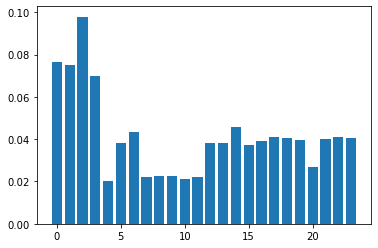

In [153]:
# decision tree for feature importance on a regression problem
# define the model
featuresList = wrapperApproach.tolist()
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=43) 
# fit the model
model.fit(features, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %s - score %.5f' % (featuresList[i], v) )
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [154]:
#Predicao sem validação cruzada
y_pred = rfe.predict(X_teste)
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

60.07


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado = cross_val_score(rfe, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Random Forest é:', resultado.mean())

In [ ]:
resultado

In [156]:
rf_pred = rfe.predict(X_teste)

## Calculando as métricas

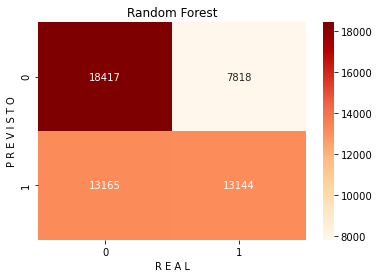

In [157]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_teste, rf_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [171]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf = accuracy_score(y_teste,rf_pred)
especificidade_rf = specificity_score(y_teste,rf_pred)
precisao_rf = precision_score(y_teste,rf_pred)
recall_rf = recall_score(y_teste,y_pred)
f1Score_rf = f1_score(y_teste,rf_pred)
curva_roc_escore_rf = roc_auc_score(y_teste,rf_pred)
kappa_rf = cohen_kappa_score(y_teste,rf_pred)
print(f'Acurácia:{round(acuracia_rf,2)}')
print(f'Especificidade:{round(especificidade_rf,2)}')
print(f'Precisão:{round(precisao_rf,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf,2)}')
print(f'F1-Score:{round(f1Score_rf,2)}')
print(f'Kappa:{round(kappa_rf,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf,2)}')

Acurácia:0.6
Especificidade:0.7
Precisão:0.63
Recall ou Sensibilidade:0.5
F1-Score:0.56
Kappa:0.2
Curva ROC:0.6


## Curva ROC

In [172]:
import matplotlib.pyplot  as pyplot

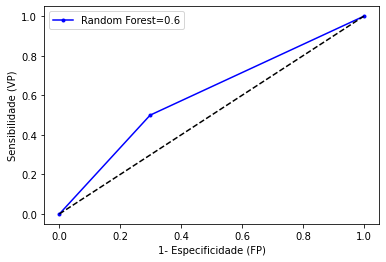

In [173]:
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Aplica o modelo de predição com Regressão Logística e Wrapper

In [174]:
clf_rl = LogisticRegression(max_iter=2000)
rfe_rl = RFE(clf_rl,n_features_to_select=24,step=1)
fit_rl = rfe_rl.fit(X,y)

In [175]:
#Armazena a nova dimensão do vetor de características
features_rl = fit_rl.fit_transform(X,y)

In [176]:
#Verifica a quantidade
print(features_rl.shape)

(122600, 24)


## Exibindo as melhores features

In [177]:
temp_rl = pandas.Series(fit_rl.support_,index = colunas)
wrapperApproach_rl = temp_rl[temp_rl==True].index
print(wrapperApproach_rl)

Index(['A', 'C', 'G', 'T', 'median', 'peak', 'none_levated_peak',
       'percentile15', 'percentile25', 'percentile50', 'percentile75',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF'],
      dtype='object')


In [178]:
#Predicao sem validação cruzada
y_pred_rl = fit_rl.predict(X_teste)
acuracidade_rl = round(accuracy_score(y_teste,y_pred_rl)*100,2)
print(acuracidade_rl)

50.03


## Validação cruzada no conjunto reduzido

In [231]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_rl = cross_val_score(fit_rl, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_rl.mean())

In [ ]:
resultado_rl

In [179]:
rl_pred = fit_rl.predict(X_teste)

## Calculando as métricas

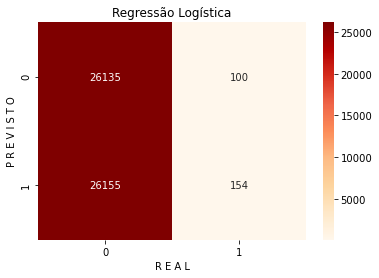

In [180]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rl_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [181]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl = accuracy_score(y_teste,rl_pred)
especificidade_rl = specificity_score(y_teste,rl_pred)
precisao_rl = precision_score(y_teste,rl_pred)
recall_rl = recall_score(y_teste,rl_pred)
f1Score_rl = f1_score(y_teste,rl_pred)
curva_roc_escore_rl = roc_auc_score(y_teste,rl_pred)
kappa_rl = cohen_kappa_score(y_teste,rl_pred)
print(f'Acurácia:{round(acuracia_rl,2)}')
print(f'Especificidade:{round(especificidade_rl,2)}')
print(f'Precisão:{round(precisao_rl,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl,2)}')
print(f'F1-Score:{round(f1Score_rl,2)}')
print(f'Kappa:{round(kappa_rl,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl,2)}')

Acurácia:0.5
Especificidade:1.0
Precisão:0.61
Recall ou Sensibilidade:0.01
F1-Score:0.01
Kappa:0.0
Curva ROC:0.5


## Curva ROC

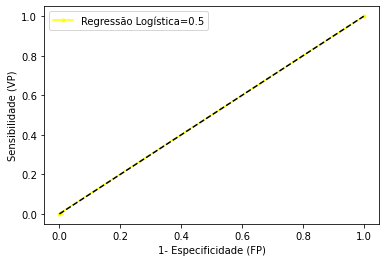

In [182]:
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='yellow')
#pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Aplica o modelo de predição com SVM e Wrapper

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10, step=0.1)
fit_svm = rfe.fit(x_train,y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
param_grid = {'C':[1e3,5e3,1e4,5e4,1e5],'gama':[0.0001,0.0005,0.001,0.005,0.1]}
svc = SVC()
clf_svm = GridSearchCV(svc, parameters)
#clf_svm = GridSearchCV(SVC(kernel='rbf'),param_grid)
fit_svm = clf_svm.fit(X,y)
#print('Best estimator found by GridSearch')
#print(clf_svm.best_estimator_)
#clf_svm = SVC(gamma='auto')
#rfe_svm = RFE(clf_svm, n_features_to_select=10, step=1)
#fit_svm = rfe_svm.fit(X,y)

In [ ]:
#Armazena a nova dimensão do vetor de características
features_svm = svm.fit_transform(X,y)

In [ ]:
#Verifica a quantidade
print(features_svm.shape)

## Obtendo as melhores feature do modelo

In [ ]:
temp_svm = pandas.Series(fit_svm.support_,index = colunas)
wrapperApproach_svm = temp_svm[temp_svm==True].index
print(wrapperApproach_svm)

In [ ]:
#Predicao sem validação cruzada
y_pred_svm = fit_svm.predict(X_teste)
acuracidade_svm = round(accuracy_score(y_teste,y_pred_svm)*100,2)
print(acuracidade_svm)

## Calculando as métricas

In [ ]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, svm_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVM')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm = accuracy_score(y_teste,svm_pred)
especificidade_svm = specificity_score(y_teste,svm_pred)
precisao_svm = precision_score(y_teste,svm_pred)
recall_svm = recall_score(y_teste,svm_pred)
f1Score_svm = f1_score(y_teste,svm_pred)
curva_roc_escore_svm = roc_auc_score(y_teste,svm_pred)
kappa_svm = cohen_kappa_score(y_teste,svm_pred)
print(f'Acurácia:{round(acuracia_rl,2)}')
print(f'Especificidade:{round(especificidade_svm,2)}')
print(f'Precisão:{round(precisao_rl,2)}')
print(f'Recall ou Sensibilidade:{round(recall_svm,2)}')
print(f'F1-Score:{round(f1Score_svm,2)}')
print(f'Kappa:{round(kappa_svm,2)}')
print(f'Curva ROC:{round(curva_roc_escore_svm,2)}')

## Curva ROC

In [ ]:
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
rfp_svm, rvp_svm,lim3 = roc_curve(y_teste,svm_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='yellow')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
pyplot.plot(rfp_svm, rvp_svm, marker='.', label='SVM='+str(round(curva_roc_escore_svm,2)),color='red')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Aplica o modelo de predição com RandomForest e Filtro

In [192]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=24)
selector.fit(X, y)

SelectKBest(k=24, score_func=<function mutual_info_classif at 0x7f98f91a7dc0>)

In [193]:
# to remove the rest of the features:
X_train_filtro = selector.transform(X)
X_teste_filtro = selector.transform(X_teste)

In [194]:
#Executando o modelo
clf_rf_filtro = RandomForestClassifier(random_state=123)      
clr_rf_filtro = clf_rf_filtro.fit(X_train_filtro,y)

In [195]:
#Predição
rf_pred_filtro = clr_rf_filtro.predict(X_teste_filtro)

## Feature importance

In [196]:
colNames = dadosTreino.columns.tolist()

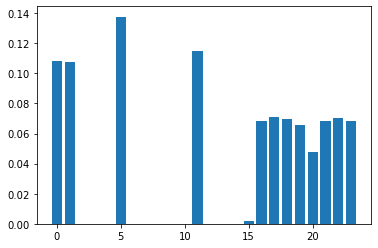

In [197]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train_filtro, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
 #    print('Feature %s - score %.5f' % (colNames[cols[i]], v) )
     #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Calculando as métricas

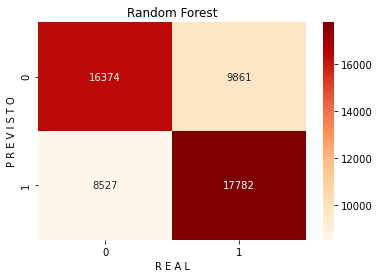

In [198]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rf_pred_filtro), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [199]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf_f = accuracy_score(y_teste,rf_pred_filtro)
especificidade_rf_f = specificity_score(y_teste,rf_pred_filtro)
precisao_rf_f = precision_score(y_teste,rf_pred_filtro)
recall_rf_f = recall_score(y_teste,rf_pred_filtro)
f1Score_rf_f = f1_score(y_teste,rf_pred_filtro)
curva_roc_escore_rf_f = roc_auc_score(y_teste,rf_pred_filtro)
kappa_rf_f = cohen_kappa_score(y_teste,rf_pred_filtro)
print(f'Acurácia:{round(acuracia_rf_f,2)}')
print(f'Especificidade:{round(especificidade_rf_f,2)}')
print(f'Precisão:{round(precisao_rf_f,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf_f,2)}')
print(f'F1-Score:{round(f1Score_rf_f,2)}')
print(f'Kappa:{round(kappa_rf_f,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf_f,2)}')

Acurácia:0.65
Especificidade:0.62
Precisão:0.64
Recall ou Sensibilidade:0.68
F1-Score:0.66
Kappa:0.3
Curva ROC:0.65


## Aplica o modelo de predição com Regressão Logística e Filter

In [200]:
#Executando o modelo
clf_rl_filtro = LogisticRegression(max_iter=2000)      
clr_rl_filtro = clf_rf_filtro.fit(X_train_filtro,y)

In [201]:
#Predição
rl_pred_filtro = clr_rl_filtro.predict(X_teste_filtro)

## Calculando as métricas

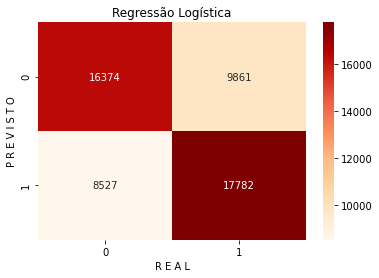

In [202]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rl_pred_filtro), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [203]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl_f = accuracy_score(y_teste,rl_pred_filtro)
especificidade_rl_f = specificity_score(y_teste,rl_pred_filtro)
precisao_rl_f = precision_score(y_teste,rl_pred_filtro)
recall_rl_f = recall_score(y_teste,rl_pred_filtro)
f1Score_rl_f = f1_score(y_teste,rl_pred_filtro)
curva_roc_escore_rl_f = roc_auc_score(y_teste,rl_pred_filtro)
kappa_rl_f = cohen_kappa_score(y_teste,rl_pred_filtro)
print(f'Acurácia:{round(acuracia_rl_f,2)}')
print(f'Especificidade:{round(especificidade_rl_f,2)}')
print(f'Precisão:{round(precisao_rf_f,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl_f,2)}')
print(f'F1-Score:{round(f1Score_rl_f,2)}')
print(f'Kappa:{round(kappa_rl_f,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl_f,2)}')

Acurácia:0.65
Especificidade:0.62
Precisão:0.64
Recall ou Sensibilidade:0.68
F1-Score:0.66
Kappa:0.3
Curva ROC:0.65


## Aplica o modelo de predição SVM com Hiperparâmetros e Filter

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf_svm_filtro = GridSearchCV(svc, parameters)
clf_svm_filtro = clf_svm_filtro.fit(X_train_filtro,y)

In [ ]:
#Predição
svm_pred_filtro = clf_svm_filtro.predict(X_teste_filtro)

## Calculando as métricas

In [ ]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, svm_pred_filtro), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVM')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm_f = accuracy_score(y_teste,svm_pred_filtro)
especificidade_svm_f = specificity_score(y_teste,svm_pred_filtro)
precisao_svm_f = precision_score(y_teste,svm_pred_filtro)
recall_svm_f = recall_score(y_teste,svm_pred_filtro)
f1Score_svm_f = f1_score(y_teste,svm_pred_filtro)
curva_roc_escore_svm_f = roc_auc_score(y_teste,svm_pred_filtro)
kappa_svm_f = cohen_kappa_score(y_teste,svm_pred_filtro)
print(f'Acurácia:{round(acuracia_svm_f,2)}')
print(f'Especificidade:{round(especificidade_svm_f,2)}')
print(f'Precisão:{round(precisao_svm_f,2)}')
print(f'Recall ou Sensibilidade:{round(recall_svm_f,2)}')
print(f'F1-Score:{round(f1Score_svm_f,2)}')
print(f'Kappa:{round(kappa_svm_f,2)}')
print(f'Curva ROC:{round(curva_roc_escore_svm_f,2)}')

## Curva ROC

In [ ]:
rfp_rl_f, rvp_rl_f,lim4 = roc_curve(y_teste,rl_pred_filtro)
rfp_rf_f, rvp_rf_f,lim5 = roc_curve(y_teste,rf_pred_filtro)
rfp_svm_f,rvp_svm_f,lim6 = roc_curve(y_teste,svm_pred_filtro)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl_f,2)),color='yellow')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf_f,2)),color='blue')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

# Autoencoders

In [205]:
# Importanfo as bibliotecas
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [206]:
#Verificando X e Y
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(122600, 49) (122600,) (52544, 49) (52544,)


In [207]:
#Pegando os números de input
n_inputs = X.shape[1]
#definindo o encoder
visible = Input(shape=(n_inputs,))

In [208]:
#Encoder nível 1. Definindo a primeira camada oculta
e = Dense(n_inputs*2)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [209]:
# Encoder nível 2. Definindo a segunda camada oculta
e = Dense(n_inputs)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [210]:
#Camada de redução. aqui que acontece a redução
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 24
bottleneck = Dense(n_bottleneck)(e)

In [211]:
#Definindo o decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [212]:
#Definindo o decoder nível 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [213]:
#Camada de saída usando a função de ativação
#É a função mais básica porque não altera a saída de um neurônio
output = Dense(n_inputs, activation='linear')(d)

In [214]:
#definindo o modelo de autoencoder model
model = Model(inputs=visible, outputs=output)

In [215]:
#Compilando o modelo autoencoder
#adam =  função com base no método de descida gradiente estocástico. Tende a convergir rapidamente.
#binary_crossentropy  = um função utilizada para problemas de classificação binária (0 ou 1)
# mse = calcula a média dos quadrados dos erros entre rótulos e previsões
#model.compile(optimizer='adam', loss='binary_crossentropy')
model.compile(optimizer='adam', loss='mse')

In [216]:
#Ajustar o modelo autoencoder para reconstruir a entrada 
history = model.fit(X,X, epochs=200, batch_size=16, verbose=2, validation_data=(X_teste,X_teste))

Epoch 1/200
7663/7663 - 22s - loss: 6.7119 - val_loss: 164.7532
Epoch 2/200
7663/7663 - 18s - loss: 1.9550 - val_loss: 94.8714
Epoch 3/200
7663/7663 - 17s - loss: 1.2577 - val_loss: 76.7719
Epoch 4/200
7663/7663 - 20s - loss: 1.2238 - val_loss: 63.1273
Epoch 5/200
7663/7663 - 21s - loss: 1.1335 - val_loss: 44.5124
Epoch 6/200
7663/7663 - 26s - loss: 1.1085 - val_loss: 40.9101
Epoch 7/200
7663/7663 - 25s - loss: 1.1711 - val_loss: 26.3052
Epoch 8/200
7663/7663 - 20s - loss: 1.1336 - val_loss: 21.7634
Epoch 9/200
7663/7663 - 17s - loss: 0.9978 - val_loss: 28.0016
Epoch 10/200
7663/7663 - 17s - loss: 0.9096 - val_loss: 39.9975
Epoch 11/200
7663/7663 - 17s - loss: 0.8601 - val_loss: 13.1212
Epoch 12/200
7663/7663 - 17s - loss: 0.7742 - val_loss: 35.3156
Epoch 13/200
7663/7663 - 17s - loss: 0.7087 - val_loss: 16.5946
Epoch 14/200
7663/7663 - 17s - loss: 0.7228 - val_loss: 26.9248
Epoch 15/200
7663/7663 - 17s - loss: 0.6555 - val_loss: 14.0932
Epoch 16/200
7663/7663 - 18s - loss: 0.6250 - va

7663/7663 - 16s - loss: 0.2387 - val_loss: 2.9636
Epoch 131/200
7663/7663 - 16s - loss: 0.2310 - val_loss: 3.2941
Epoch 132/200
7663/7663 - 17s - loss: 0.2283 - val_loss: 3.9180
Epoch 133/200
7663/7663 - 19s - loss: 0.2162 - val_loss: 3.7304
Epoch 134/200
7663/7663 - 17s - loss: 0.2410 - val_loss: 3.5848
Epoch 135/200
7663/7663 - 17s - loss: 0.2381 - val_loss: 3.0619
Epoch 136/200
7663/7663 - 16s - loss: 0.2165 - val_loss: 3.3166
Epoch 137/200
7663/7663 - 16s - loss: 0.2176 - val_loss: 3.1800
Epoch 138/200
7663/7663 - 16s - loss: 0.2270 - val_loss: 4.4058
Epoch 139/200
7663/7663 - 17s - loss: 0.2210 - val_loss: 3.7110
Epoch 140/200
7663/7663 - 19s - loss: 0.2272 - val_loss: 3.3409
Epoch 141/200
7663/7663 - 17s - loss: 0.2209 - val_loss: 5.2368
Epoch 142/200
7663/7663 - 16s - loss: 0.2453 - val_loss: 3.3291
Epoch 143/200
7663/7663 - 20s - loss: 0.2369 - val_loss: 3.2128
Epoch 144/200
7663/7663 - 21s - loss: 0.2117 - val_loss: 3.2490
Epoch 145/200
7663/7663 - 22s - loss: 0.2043 - val_los

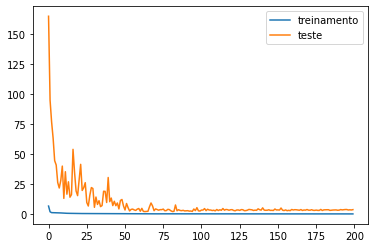

In [217]:
# Com a função de perda MSE 500 cópia
pyplot.plot(history.history['loss'], label='treinamento')
pyplot.plot(history.history['val_loss'], label='teste')
pyplot.legend()
pyplot.show()

In [218]:
# definir um modelo de codificador (sem o decodificador) 
encoder = Model(inputs=visible, outputs=bottleneck)

In [219]:
# salvo o encoder para usar depois
encoder.save('encoder_projeto_200.h5')

## Treinando um modelo Random Forest com a rede neural

In [220]:
# Carrega o modelo
from tensorflow.keras.models import load_model
encoder = load_model('encoder_projeto_200.h5')

In [221]:
# Treinando no encoder
X_train_encode = encoder.predict(X)
# encode the test data
X_test_encode = encoder.predict(X_teste)

In [222]:
#Define o modelo copia MSE
floresta = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123) 
#Ajuste do modelo do conjunto de treinamento
floresta.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_rf = floresta.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_rf)
print(acc)

0.5938451583434835


## Calculando as métricas

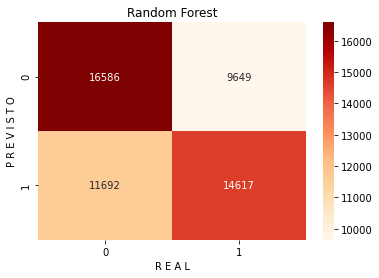

In [223]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [225]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf_rede = accuracy_score(y_teste,pred_rf)
especificidade_rf_rede = specificity_score(y_teste,pred_rf)
precisao_rf_rede = precision_score(y_teste,pred_rf)
recall_rf_rede = recall_score(y_teste,pred_rf)
f1Score_rf_rede = f1_score(y_teste,pred_rf)
curva_roc_escore_rf_rede = roc_auc_score(y_teste,pred_rf)
kappa_rf_rede = cohen_kappa_score(y_teste,pred_rf)
print(f'Acurácia:{round(acuracia_rf_rede,2)}')
print(f'Especificidade:{round(especificidade_rf_rede,2)}')
print(f'Precisão:{round(acuracia_rf_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf_rede,2)}')
print(f'F1-Score:{round(f1Score_rf_rede,2)}')
print(f'Kappa:{round(kappa_rf_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf_rede,2)}')

Acurácia:0.59
Especificidade:0.63
Precisão:0.59
Recall ou Sensibilidade:0.56
F1-Score:0.58
Kappa:0.19
Curva ROC:0.59


## Treinando um modelo de Regressão Logística com a rede neural.

In [226]:
#Define o modelo
model = LogisticRegression(max_iter=2000)
#Ajuste do modelo do conjunto de treinamento
model.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_rl = model.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_rl)
print(acc)

0.5233137941534713


## Calculando as métricas

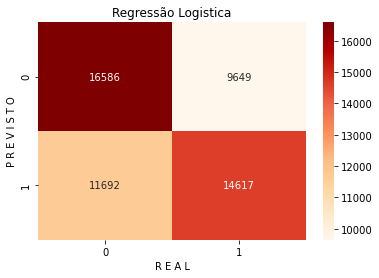

In [227]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logistica')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [228]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl_rede = accuracy_score(y_teste,pred_rl)
especificidade_rl_rede = specificity_score(y_teste,pred_rl)
precisao_rl_rede = precision_score(y_teste,pred_rl)
recall_rl_rede = recall_score(y_teste,pred_rl)
f1Score_rl_rede = f1_score(y_teste,pred_rl)
curva_roc_escore_rl_rede = roc_auc_score(y_teste,pred_rl)
kappa_rl_rede = cohen_kappa_score(y_teste,pred_rl)
print(f'Acurácia:{round(acuracia_rl_rede,2)}')
print(f'Especificidade:{round(especificidade_rl_rede,2)}')
print(f'Precisão:{round(precisao_rl_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl_rede,2)}')
print(f'F1-Score:{round(f1Score_rl_rede,2)}')
print(f'Kappa:{round(kappa_rl_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl_rede,2)}')

Acurácia:0.52
Especificidade:0.73
Precisão:0.54
Recall ou Sensibilidade:0.32
F1-Score:0.4
Kappa:0.05
Curva ROC:0.52


## Curva ROC: Wrapper X Filtro X Autoencoder

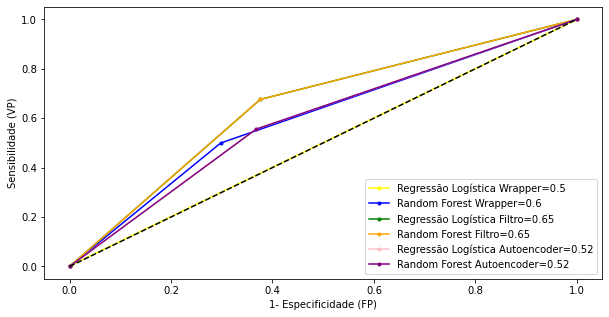

In [231]:
#Wrapper
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística Wrapper='+str(round(curva_roc_escore_rl,2)),color='yellow')
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest Wrapper='+str(round(curva_roc_escore_rf,2)),color="blue")

#Filtro
rfp_rl_f, rvp_rl_f,lim4 = roc_curve(y_teste,rl_pred_filtro)
rfp_rf_f, rvp_rf_f,lim5 = roc_curve(y_teste,rf_pred_filtro)
pyplot.plot(rfp_rl_f, rvp_rl_f, marker='.', label='Regressão Logística Filtro='+str(round(curva_roc_escore_rl_f,2)),color='green')
pyplot.plot(rfp_rf_f, rvp_rf_f, marker='.', label='Random Forest Filtro='+str(round(curva_roc_escore_rf_f,2)),color='orange')


#Autoencoder

rfp_rl_rede, rvp_rl_rede,lim7 = roc_curve(y_teste,pred_rl)
rfp_rl_rede, rvp_rl_rede,lim8 = roc_curve(y_teste,pred_rf)
plt.plot(rfp_rl_rede, rvp_rl_rede, marker='.', label='Regressão Logística Autoencoder='+str(round(curva_roc_escore_rl_rede,2)),color='pink')
plt.plot(rfp_rl_rede, rvp_rl_rede, marker='.', label='Random Forest Autoencoder='+str(round(curva_roc_escore_rl_rede,2)),color='purple')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade (FP)')
plt.ylabel('Sensibilidade (VP)')
plt.legend()
# Mostrando o gráfico
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

## Comparando as métricas

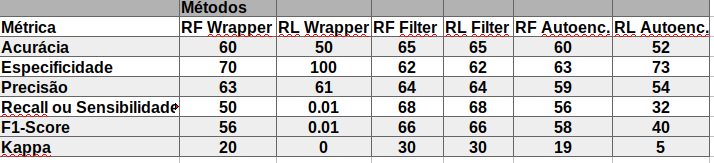

In [232]:
Image(filename='tab_metricas.png')

# Referências
### [1] MACHINELEARNINGMASTERY. Disponível em: https://machinelearningmastery.com/autoencoder-for-classification/.Acesso em 21/11/2021.
### [2] Wang, J., & Wang, L. (2020). Prediction and prioritization of autism-associated long non-coding RNAs using gene expression and sequence features. BMC Bioinformatics, 21(1), 1–15. https://doi.org/10.1186/s12859-020-03843-5.
### [3] MONOLITONIMBUS. Disponível em: https://www.monolitonimbus.com.br/modelo-sequencial-do-keras/. Acesso em: 21/11/2021.
### [4] KERAS. Disponível em: https://keras.io/api/losses/. Acesso em 21/11/2021.
### [5] KERAS-Optimizer. Disponível em: https://keras.io/guides/training_with_built_in_methods/. Acesso em 22/11/2021.